In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel('Rice_Cammeo_Osmancik.xlsx')

In [5]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [13]:
"""
1.load your data
2.data cleaning
3.search for missing values and make the data into structure formate
4.before apply model do first primary analysis the get the pattern called as exploratory data analysis
5. 
""";

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
pd.set_option('display.max_columns',None)

In [23]:
x = df.drop('Class',axis = 1)

In [37]:
y = df['Class']

In [39]:
x.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent'],
      dtype='object')

In [31]:
y.value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

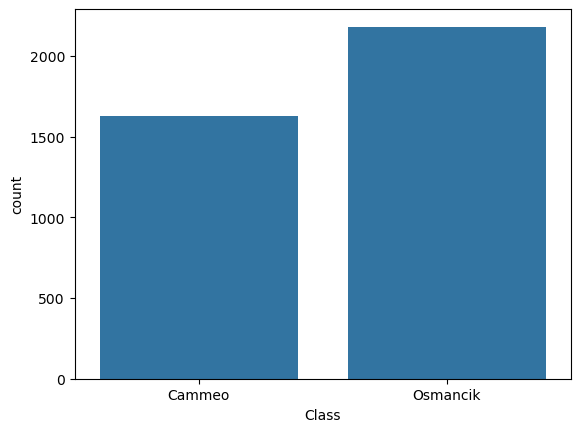

In [33]:
sns.countplot(x = y);

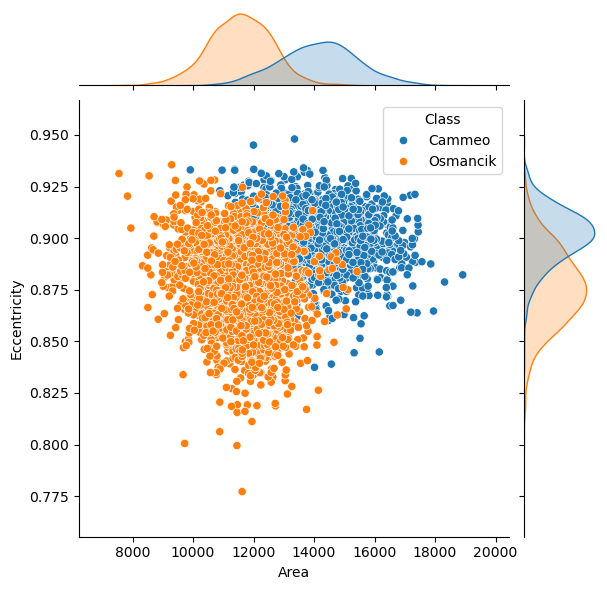

In [43]:
sns.jointplot(x = 'Area',y = 'Eccentricity',data = df,hue = 'Class');

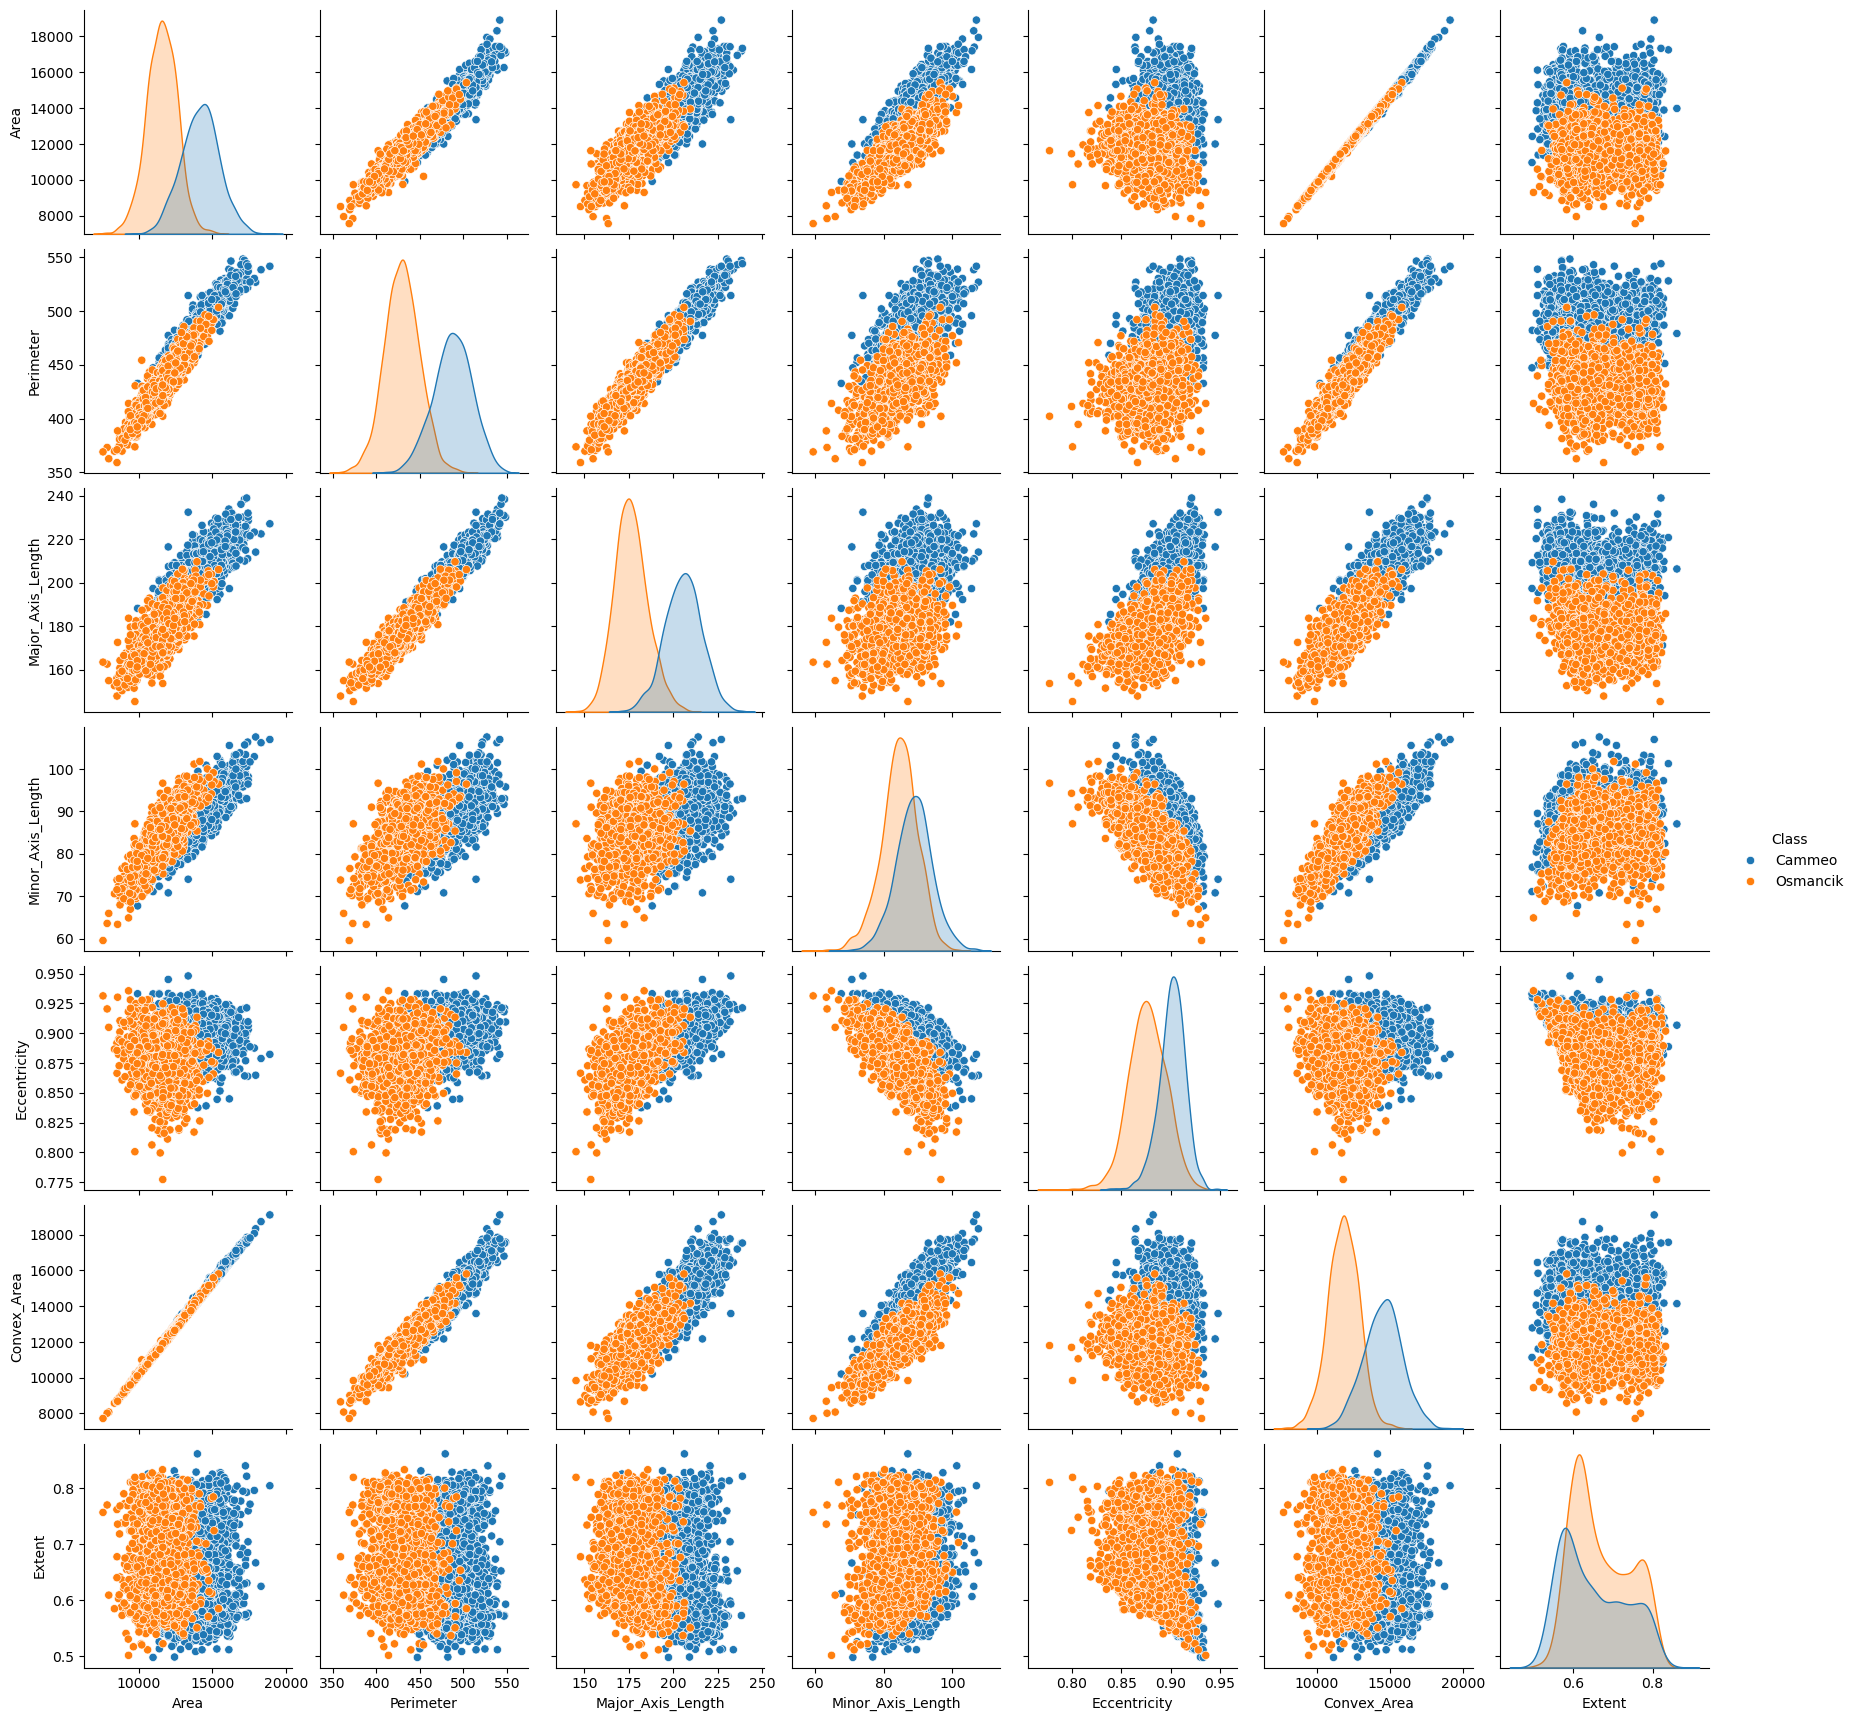

In [45]:
sns.pairplot(df, hue = 'Class');

In [51]:
one = x.iloc[:,0:4]
one['Class'] = y



In [55]:
two = x.iloc[:,4:]
two['Class'] = y

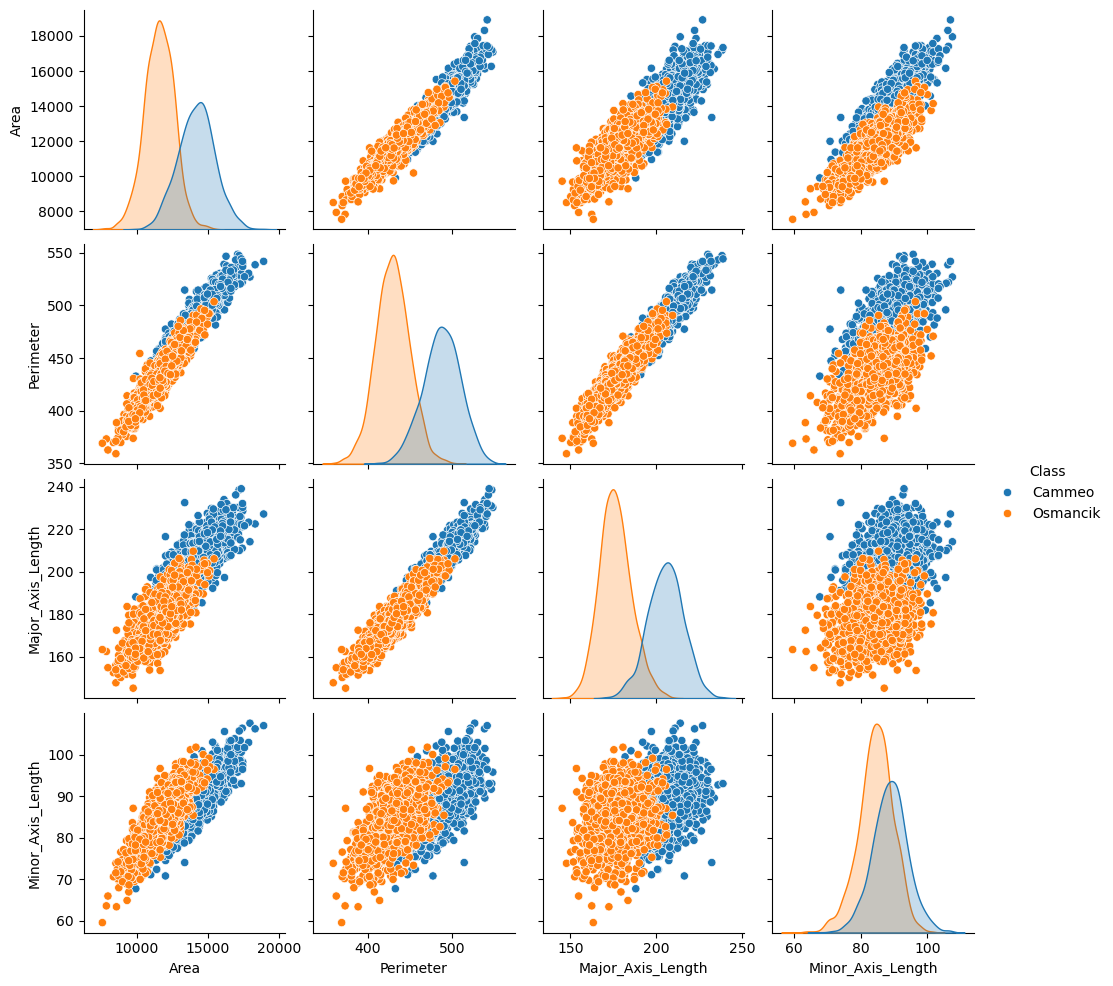

In [57]:
sns.pairplot(one,hue = 'Class');

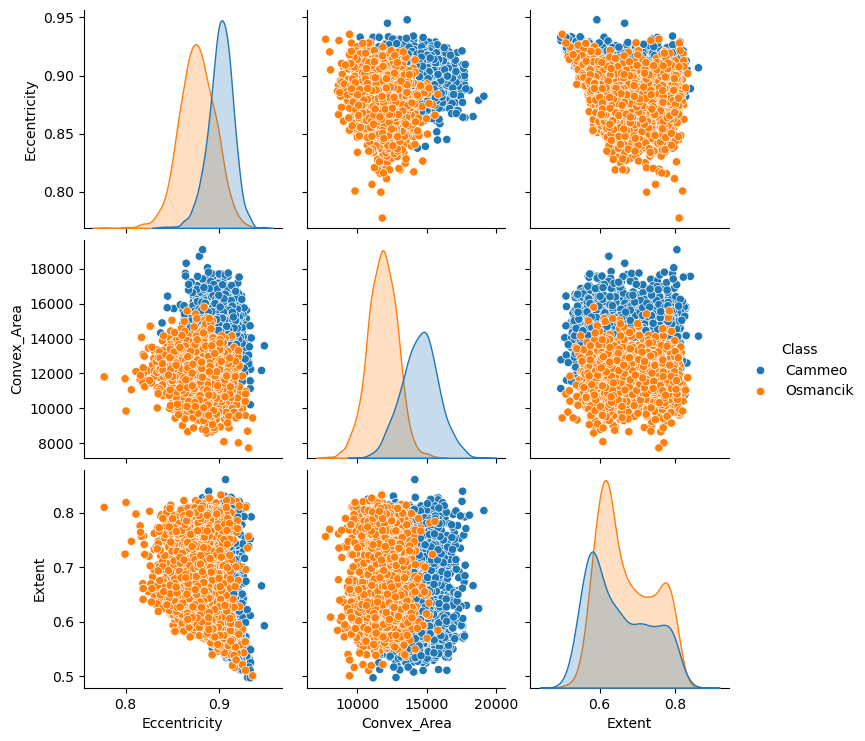

In [61]:
sns.pairplot(two,hue = 'Class');

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

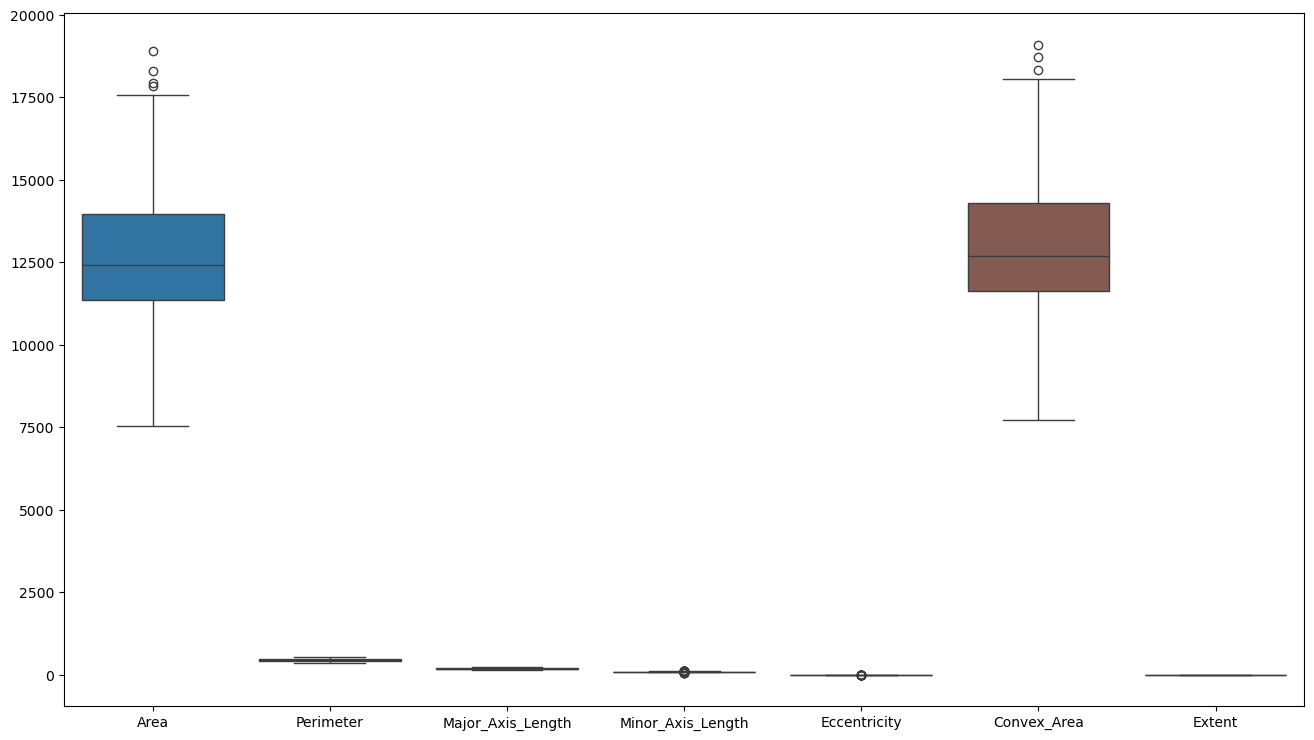

In [81]:
plt.figure(figsize = (16,9))
sns.boxplot(data = x);

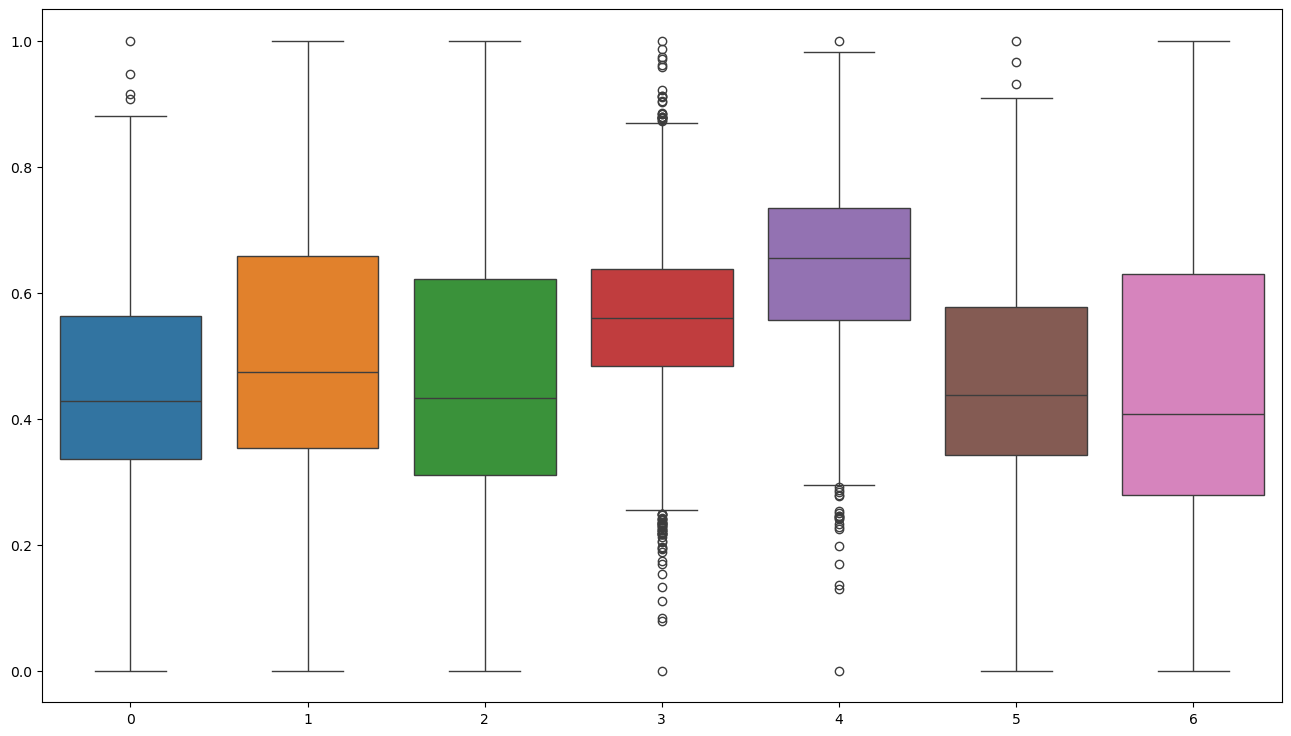

In [79]:
plt.figure(figsize = (16,9))
sns.boxplot(data = x_scaled);


In [87]:
from sklearn.ensemble import IsolationForest

In [89]:
iso = IsolationForest(contamination = 0.05,random_state = 0)

In [91]:
clean  = iso.fit_predict(x)

In [93]:
clean

array([-1,  1,  1, ...,  1,  1,  1])

In [99]:
x_clean  = x[clean == 1]
y_clean = y[clean == -1]